In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_texas_sim = pd.read_csv('texas_cosine_weights50.csv')

In [3]:
df_nodes=pd.read_csv('texas_labels.csv')

In [4]:
df_texas = df_texas_sim[['source','target','weight']]
df_texas['weight']= 1 - df_texas['weight']
#df_texas_sim['weight']= 1 / df_texas_sim['weight']
df_texas.head()

,source,target,weight
0,0,58,0.413142
1,0,121,0.382620
2,1,80,0.357434
3,2,8,0.210905
4,3,56,0.480415


In [5]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_texas['weight'] = scaler.fit_transform(df_texas[['weight']])#
#df_texas.head()

In [6]:
df_texas.describe()

,source,target,weight
count,279.000000,279.000000,279.000000
mean,54.849462,109.806452,0.421489
std,34.661450,44.420795,0.128853
min,0.000000,8.000000,0.042479
25%,29.500000,67.500000,0.357560
50%,56.000000,111.000000,0.424568
75%,65.000000,147.500000,0.508523
max,173.000000,182.000000,0.729116


In [7]:
texas_graph= nx.from_pandas_edgelist(df_texas, 'source', 'target', create_using=nx.DiGraph())

In [8]:
texas_graph.number_of_edges()

279

In [9]:
GNN_dist= nx.from_pandas_edgelist(df_texas, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [10]:
GNN_sim= nx.from_pandas_edgelist(df_texas_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_texas

In [11]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [12]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

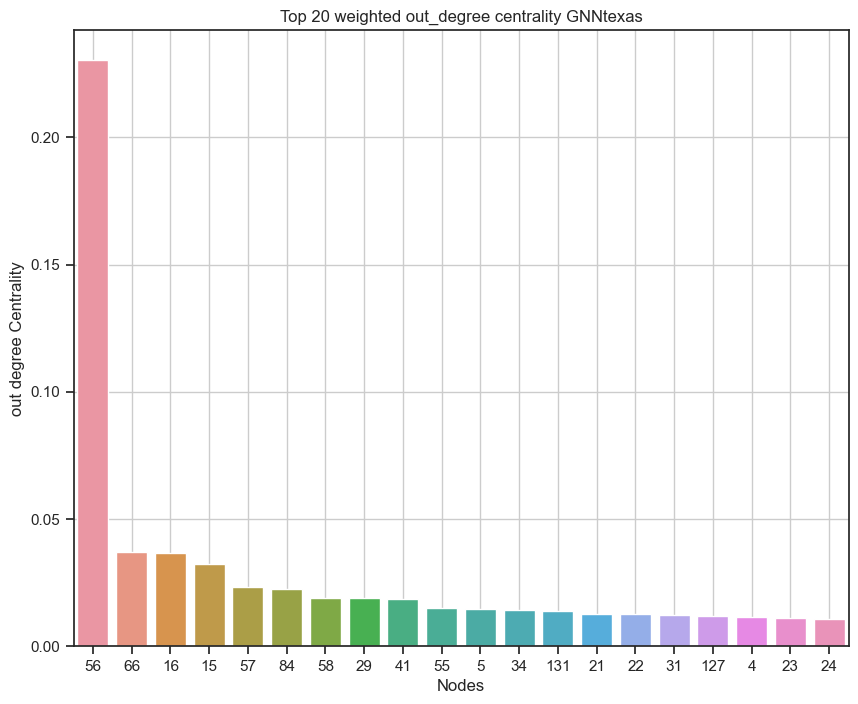

In [13]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNtexas')
plt.grid()
plt.show()

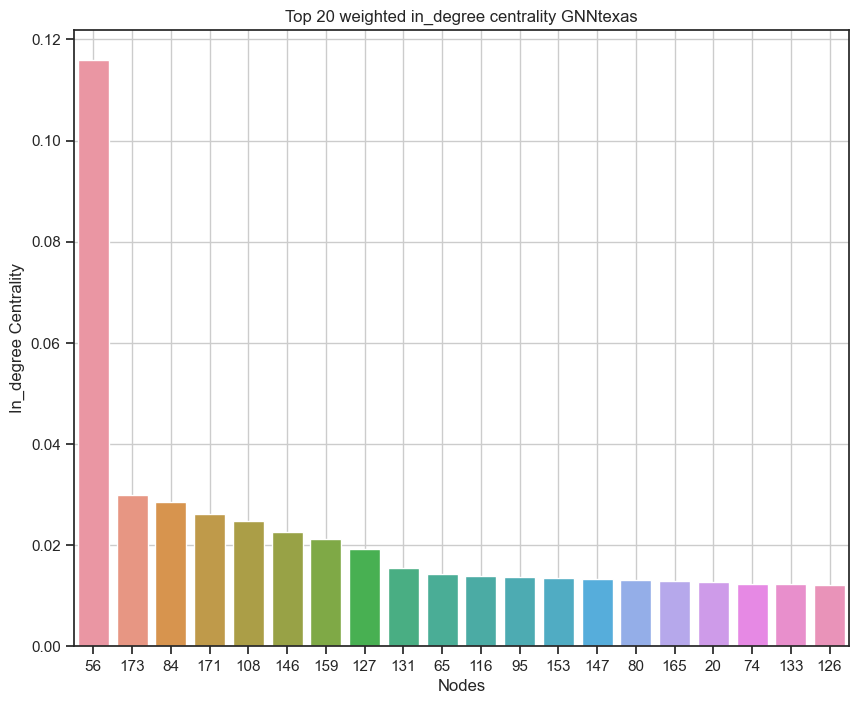

In [14]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNtexas')
plt.grid()
plt.show()

## texas graph

In [15]:
texas_out_degree = weighted_out_degree(texas_graph)
texas_in_degree = weighted_in_degree(texas_graph)

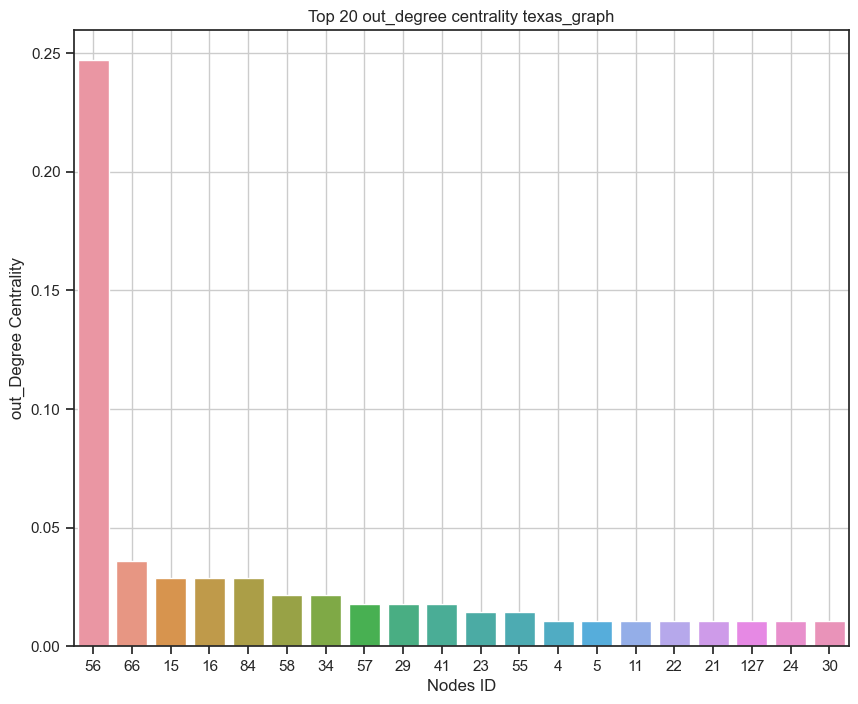

In [16]:

keys = list(map(str,list(texas_out_degree.keys())[:20]))
values = list(texas_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality texas_graph')
plt.grid()
plt.show()

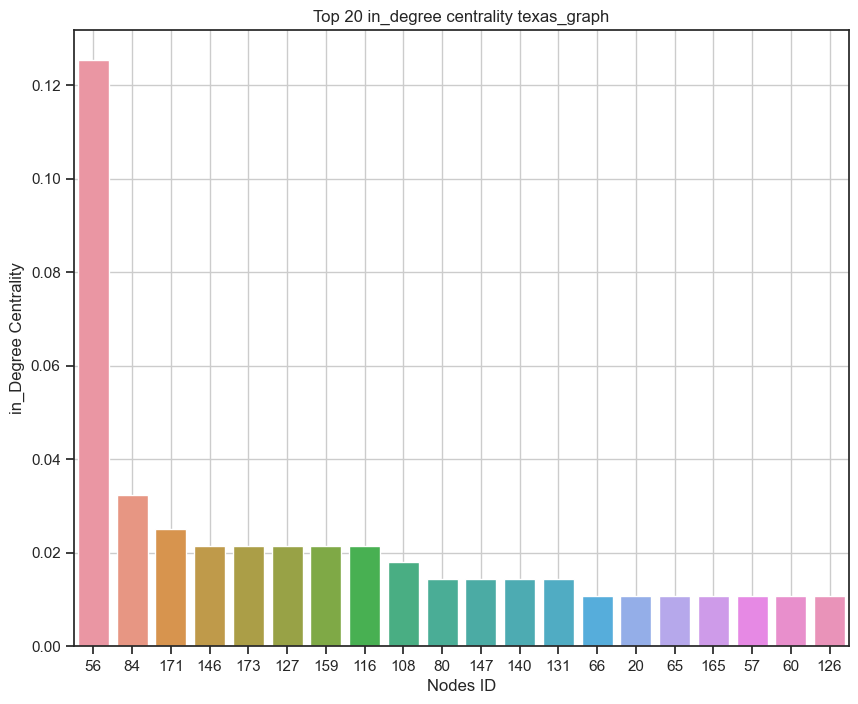

In [17]:
keys = list(map(str,list(texas_in_degree.keys())[:20]))
values = list(texas_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality texas_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_texas

In [18]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

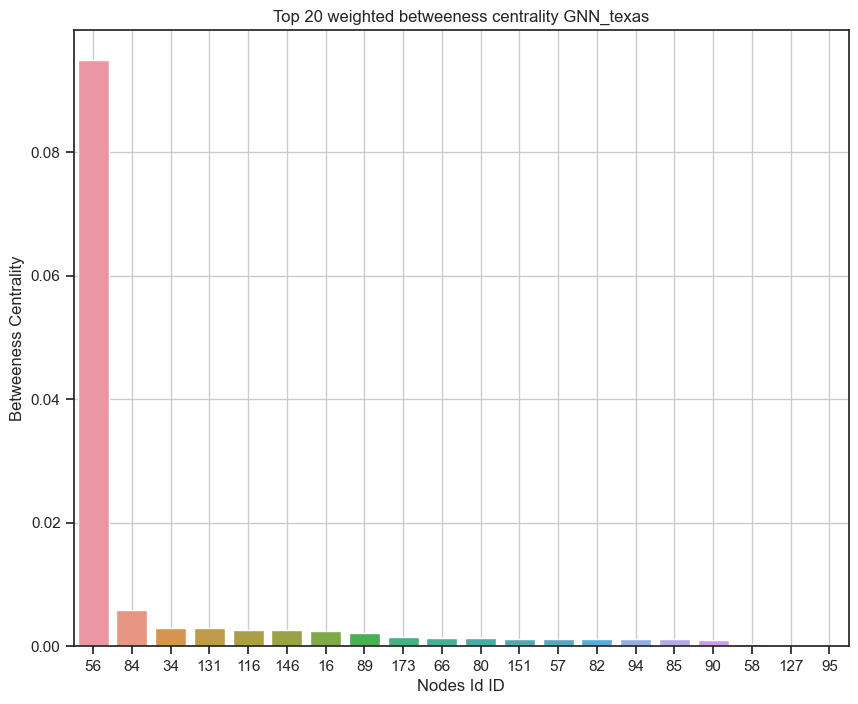

In [19]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_texas')
plt.grid()
plt.show()

## texas graph

In [20]:
bet_texas_graph = nx.betweenness_centrality(texas_graph)

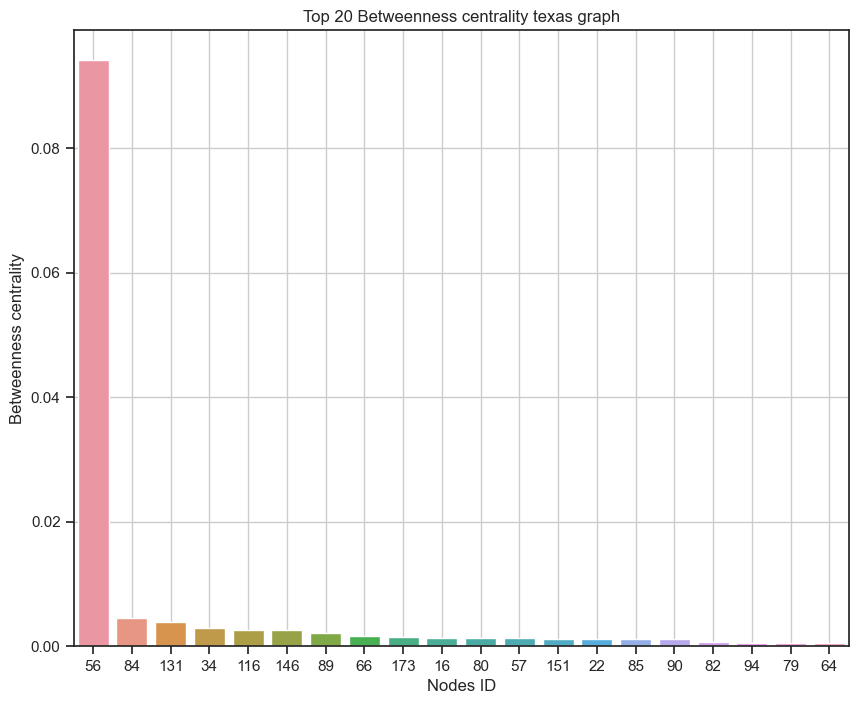

In [21]:
bet_texas_graph = dict(sorted(bet_texas_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_texas_graph.keys())[:20]))
values = list(bet_texas_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality texas graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_texas

In [22]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

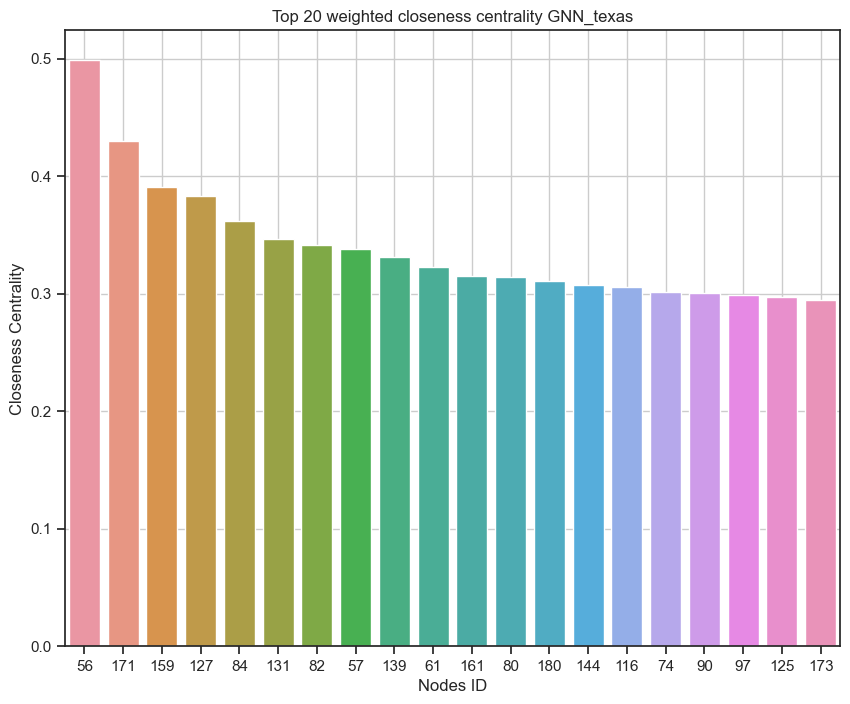

In [23]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_texas')
plt.grid()
plt.show()

## texas

In [24]:
closeness_texas_graph = nx.closeness_centrality(texas_graph)

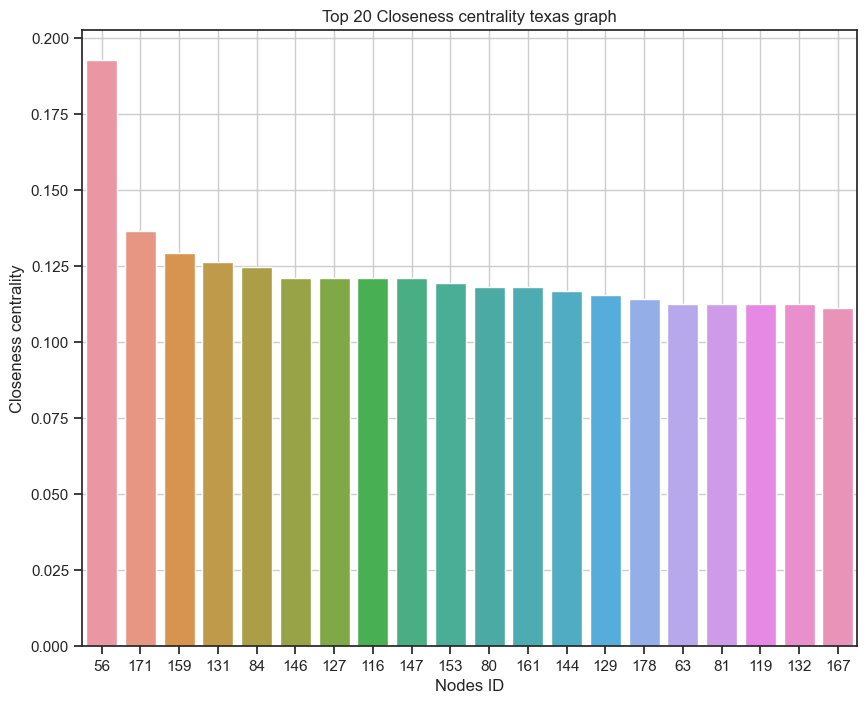

In [25]:
closeness_texas_graph = dict(sorted(closeness_texas_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_texas_graph.keys())[:20]))
values = list(closeness_texas_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality texas graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_texas

In [26]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

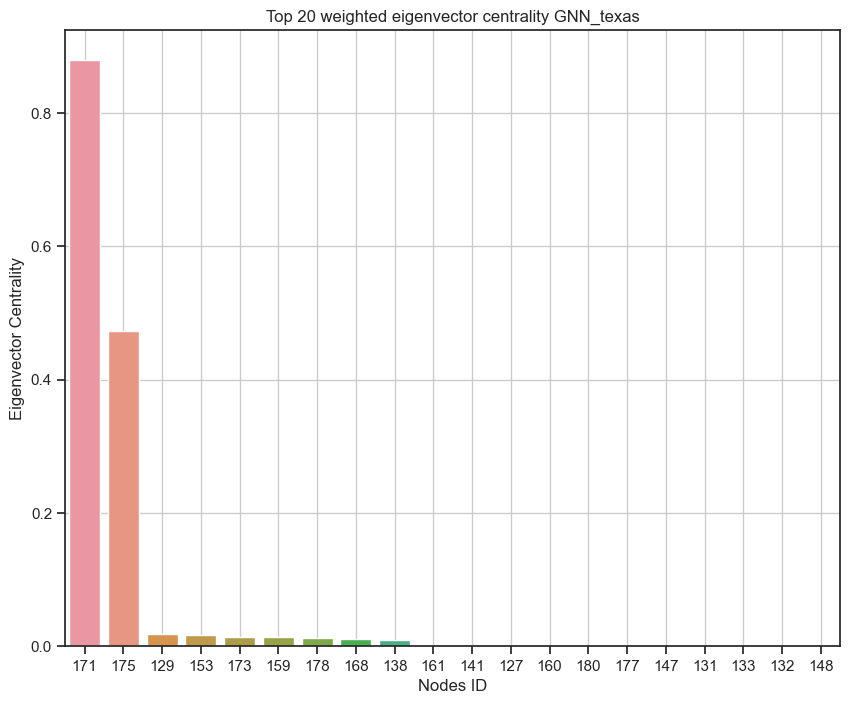

In [27]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_texas')
plt.grid()
plt.show()

## texas graph

In [28]:
eigen_texas_graph = nx.eigenvector_centrality(texas_graph, max_iter = 1000)

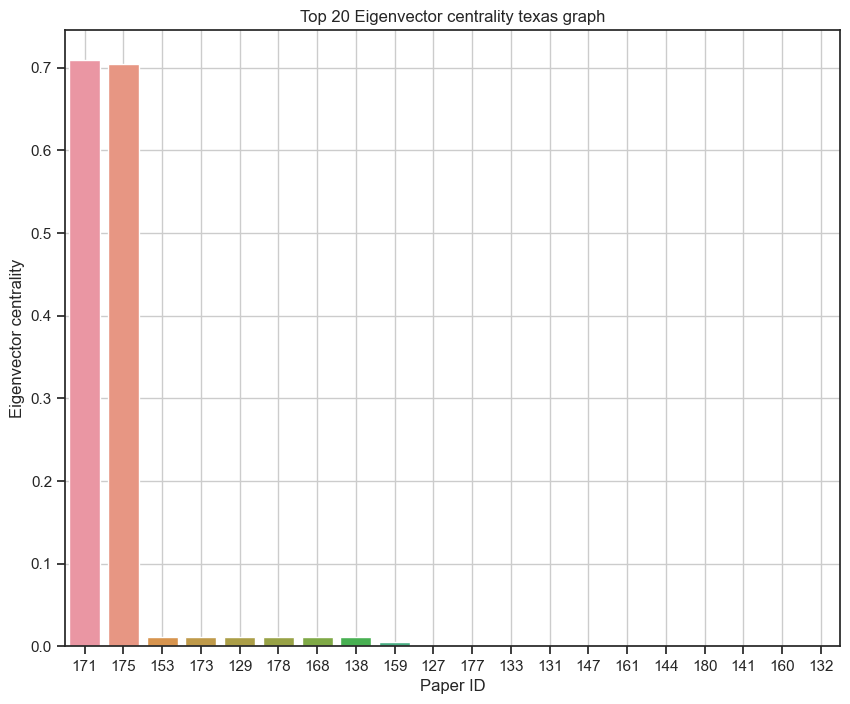

In [29]:
eigen_texas_graph = dict(sorted(eigen_texas_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_texas_graph.keys())[:20]))
values = list(eigen_texas_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality texas graph')
plt.grid()
plt.show()

# Efficiency

In [30]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [31]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.146

In [32]:
weighted_global_efficiency(texas_graph)

0.055

## Modularity

In [33]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [34]:
print(weighted_modularty(GNN_sim))

0.543


In [35]:
print(weighted_modularty(texas_graph))

0.555


# Community

In [36]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_texas = greedy_modularity_communities(texas_graph)

In [37]:
print(len(comm_GNN))
print(len(comm_texas))

14
13


In [38]:
for c in range(len(comm_GNN)):
    print(len(comm_GNN[c]),len(comm_texas[c]),jaccard(comm_GNN[c], comm_texas[c]))

53 50 0.9433962264150944
25 21 0.0
22 20 0.0
17 18 0.9444444444444444
15 15 0.875
10 10 0.8181818181818182
10 10 1.0
7 10 0.0
6 8 0.75
6 7 0.0
5 6 0.0
3 5 0.0
2 3 0.0


IndexError: list index out of range

In [ ]:
for com in comm_GNN:
    print(len(com))

53
25
22
17
15
10
10
7
6
6
5
3
2
2


In [ ]:
for com in comm_texas:
    print(len(com))

50
21
20
18
15
10
10
10
8
7
6
5
3


In [ ]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [ ]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [ ]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_texas = [gini_index(i,labels) for i in comm_texas]
#scipy.stats.wilcoxon(gini_GNN, gini_texas)

In [ ]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_texas))

mannwhitneyu MannwhitneyuResult(statistic=86.5, pvalue=0.8458148386257579)


In [ ]:
df_nodes['label'].unique()

array([3, 0, 2, 4, 1], dtype=int64)

<AxesSubplot:>

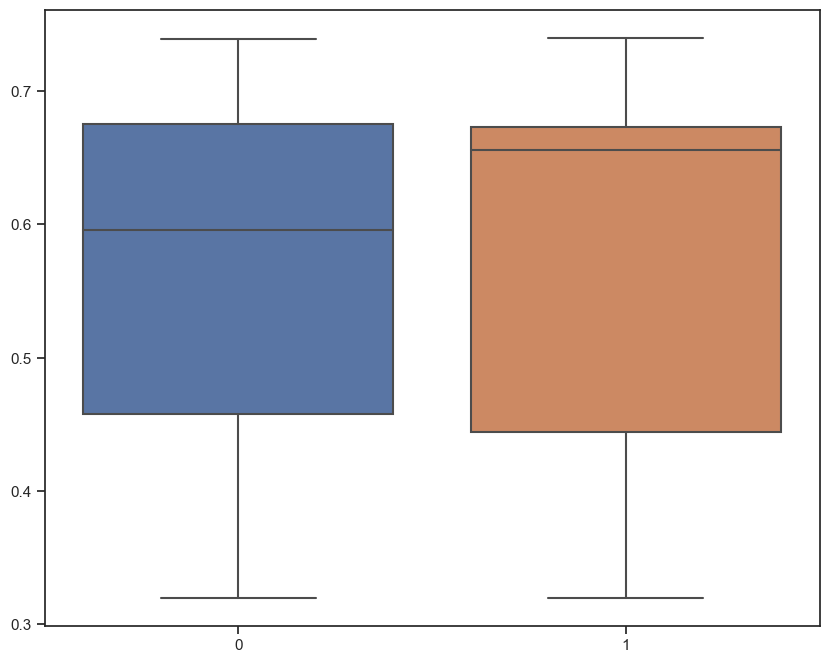

In [ ]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_texas]

sns.boxplot(data=all_arr, )

In [ ]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.558

In [ ]:
gini=0
clusters = comm_texas
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.575

In [ ]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(texas_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.08484848484848485
p_value 0.21100415197761646
Jaccard Index: 0.9607843137254902
[56, 66, 16, 15, 57, 84, 58, 29, 41, 55, 5, 34, 131, 21, 22, 31, 127, 4, 23, 24, 39, 50, 145, 62, 6, 76, 64, 11, 113, 28, 79, 18, 17, 44, 9, 37, 30, 48, 49, 146, 25, 0, 7, 82, 8, 96, 116, 20, 46, 47, 10, 173, 107, 72, 78, 100, 150, 45, 53, 133, 156, 94, 120, 26, 3, 35, 167, 12, 19, 95, 27, 89, 129, 151, 61, 51, 80, 52, 122, 38, 13, 33, 88, 99, 43, 105, 85, 42, 73, 32, 148, 1, 59, 70, 54, 117, 2, 36, 90, 75]
[56, 66, 15, 16, 84, 58, 34, 57, 29, 41, 23, 55, 4, 5, 11, 22, 21, 127, 24, 30, 31, 39, 47, 116, 131, 0, 146, 6, 7, 9, 17, 18, 25, 28, 50, 37, 44, 46, 48, 49, 53, 54, 62, 64, 79, 82, 76, 113, 120, 145, 1, 80, 2, 8, 3, 20, 173, 10, 94, 12, 13, 59, 85, 133, 19, 36, 167, 26, 27, 32, 33, 42, 78, 35, 83, 38, 43, 45, 95, 150, 51, 52, 61, 75, 87, 89, 90, 117, 129, 88, 73, 151, 70, 72, 99, 96, 100, 105, 107, 156]


In [ ]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(texas_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.08000000000000002
p_value 0.2382651059996148
Jaccard Index: 0.7094017094017094
[56, 173, 84, 171, 108, 146, 159, 127, 131, 65, 116, 95, 153, 147, 80, 165, 20, 74, 133, 126, 167, 177, 60, 82, 66, 144, 102, 68, 57, 168, 99, 110, 170, 150, 129, 164, 162, 104, 83, 81, 178, 118, 63, 59, 85, 119, 58, 93, 172, 97, 132, 180, 139, 151, 140, 115, 138, 182, 175, 123, 29, 101, 174, 106, 161, 16, 22, 92, 94, 36, 135, 155, 143, 75, 149, 157, 114, 89, 166, 142, 14, 98, 179, 112, 152, 109, 64, 124, 176, 79, 160, 154, 163, 134, 77, 91, 73, 137, 62, 128]
[56, 84, 171, 146, 173, 127, 159, 116, 108, 80, 147, 140, 131, 66, 20, 65, 165, 57, 60, 126, 133, 74, 167, 95, 180, 82, 144, 153, 102, 177, 58, 164, 94, 59, 85, 139, 97, 162, 83, 104, 118, 93, 141, 68, 150, 125, 63, 81, 110, 119, 129, 132, 161, 170, 172, 178, 151, 99, 168, 121, 8, 101, 14, 34, 106, 16, 22, 92, 174, 123, 29, 115, 36, 40, 130, 182, 42, 50, 78, 114, 71, 61, 62, 64, 69, 75, 77, 79, 87, 89, 90, 91, 98, 103, 109, 112, 117, 124, 128, 13

In [ ]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_texas_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.0076767676767676785
p_value 0.9098970177669466
Jaccard Index: 0.9607843137254902
[56, 84, 34, 131, 116, 146, 16, 89, 173, 66, 80, 151, 57, 82, 94, 85, 90, 58, 127, 95, 73, 148, 20, 133, 29, 8, 99, 22, 167, 83, 150, 156, 0, 121, 1, 2, 3, 4, 164, 5, 101, 6, 171, 7, 14, 9, 106, 10, 108, 11, 12, 13, 15, 65, 165, 92, 174, 59, 60, 123, 126, 17, 18, 139, 19, 115, 21, 36, 74, 23, 147, 24, 40, 130, 25, 26, 27, 28, 97, 162, 182, 30, 159, 31, 32, 33, 42, 50, 78, 35, 37, 38, 39, 140, 41, 104, 118, 93, 43, 44]
[56, 84, 131, 34, 116, 146, 89, 66, 173, 16, 80, 57, 151, 22, 85, 90, 82, 94, 79, 64, 167, 58, 127, 95, 73, 148, 133, 29, 20, 78, 8, 50, 99, 42, 83, 150, 156, 59, 0, 121, 1, 2, 3, 4, 164, 5, 101, 6, 171, 7, 14, 9, 106, 10, 108, 11, 12, 13, 15, 65, 165, 92, 174, 60, 123, 126, 17, 18, 139, 19, 115, 21, 36, 74, 23, 147, 24, 40, 130, 25, 26, 27, 28, 97, 162, 182, 30, 159, 31, 32, 33, 35, 37, 38, 39, 140, 41, 104, 118, 93]


In [ ]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_texas_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.3368421052631579
p_value 0.039762136700688226
Jaccard Index: 0.3333333333333333
[56, 171, 159, 127, 84, 131, 82, 57, 139, 61, 161, 80, 180, 144, 116, 74, 90, 97, 125, 173]
[56, 171, 159, 131, 84, 146, 127, 116, 147, 153, 80, 161, 144, 129, 178, 63, 81, 119, 132, 167]


In [ ]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_texas_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.24363636363636365
p_value 0.0003286428631838123
Jaccard Index: 0.9801980198019802
[171, 175, 129, 153, 173, 159, 178, 168, 138, 161, 141, 127, 160, 180, 177, 147, 131, 133, 132, 148, 144, 164, 152, 116, 84, 140, 99, 82, 67, 176, 146, 111, 165, 170, 110, 151, 65, 158, 157, 80, 93, 57, 61, 139, 150, 90, 97, 125, 74, 117, 136, 68, 169, 94, 85, 69, 103, 181, 87, 128, 118, 59, 172, 62, 137, 91, 77, 134, 154, 102, 79, 104, 124, 64, 109, 167, 112, 179, 98, 142, 166, 119, 89, 63, 81, 149, 75, 143, 155, 135, 86, 73, 162, 95, 115, 56, 88, 163, 60, 42]
[171, 175, 153, 173, 129, 178, 168, 138, 159, 127, 177, 133, 131, 147, 161, 144, 180, 141, 160, 132, 164, 148, 152, 84, 116, 82, 99, 176, 65, 165, 110, 170, 146, 151, 67, 111, 140, 157, 158, 80, 93, 68, 150, 63, 81, 119, 57, 74, 59, 85, 97, 167, 94, 139, 104, 118, 125, 172, 61, 62, 64, 69, 75, 77, 79, 87, 89, 90, 91, 98, 103, 109, 112, 117, 124, 128, 134, 135, 136, 137, 142, 143, 149, 154, 155, 166, 169, 179, 181, 102, 162, 95, 115, 86, 73, 